<a href="https://colab.research.google.com/github/gasujina-prog/Python25Study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공신경망 구성절차
# 1. 더미데이터 준비
# 2. 훈련용, 검증용, 테스트용으로 나눔
# 3. 심층을 만듬(dense)
# 4. model에 적용
# 5. 컴파일 진행(최적화 기법 adam을 적용)
# 6. fit(훈련)
# 7. evaluate(검증)

In [ ]:
# 손실곡선 : fit() 메서드로 모델훈련 하는동안 훈련과정이
# 상세하게 출력되어 확인할 수 있다. (에포크 횟수, 손실, 정확도)
# 아래쪽에 이 출력 메시지가 나옴.
# 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

# 다시말해 fit() 메서드는 History라는 클래스 객체를 반환 함 (훈련과정의 지표, 손실, 정확도 등 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

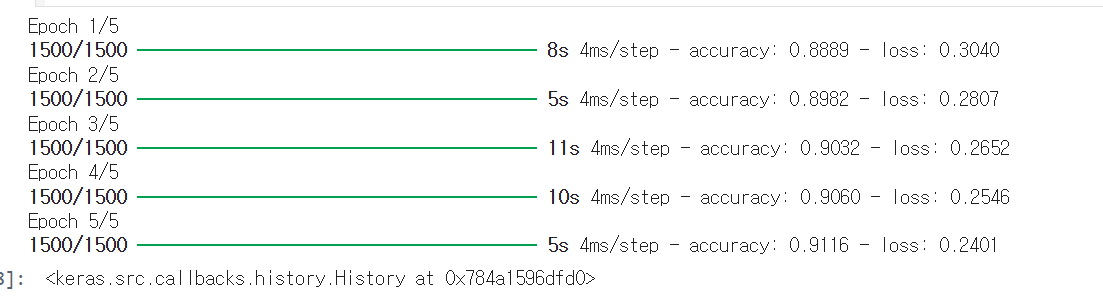

In [4]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
print("훈련 데이터 :")
print(train_scaled.shape, train_target.shape)
print("테스트 데이터 :")
print(test_input.shape, test_target.shape)
print("검증 데이터 :")
print(val_scaled.shape, val_target.shape)

훈련 데이터 :
(48000, 28, 28) (48000,)
테스트 데이터 :
(10000, 28, 28) (10000,)
검증 데이터 :
(12000, 28, 28) (12000,)


In [9]:
# 모델을 만드는 함수를 정의함 (하나의 매개변수를 받아 리턴) .model_fn(dense 추가하면 생성)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [10]:
model = model_fn()  # 위에서 만든 메서드 호출 하여 모델에 담음
#       model_fn(매개값이 없으면 그냥 생성, 매개값이 있으면 모델추가용)
model.summary()     # 모델의 요약정보를 봄

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                       다중분류                                 정확도

In [17]:
# fit() 메서드 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=2) # 총 21초 소요
#                                                          훈련과정 출력 조절
#                                 verbose=0 훈련과정 안나타냄
#                                 verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표 출렫
#                                 verbose=2 진행 막대빼고 출력

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9113 - loss: 0.2575
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9136 - loss: 0.2528
Epoch 3/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9159 - loss: 0.2463
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9190 - loss: 0.2402
Epoch 5/5
1500/1500 - 3s - 2ms/step - accuracy: 0.9202 - loss: 0.2367


In [18]:
print(history) # 위에 fit한 결과를 가진 history 객체를 동일명의 변수에 담음

In [21]:
print(history.history.keys())
# 훈련 측정 값이 담긴 history 딕셔너리가 존재한다.
# 여기엔 정확도, 손실값이 있다.

# 정확도의 경우는 compile() 메서드의 metrics 매개변수에 추가한거라 history 속성에 있는거임.

dict_keys(['accuracy', 'loss'])


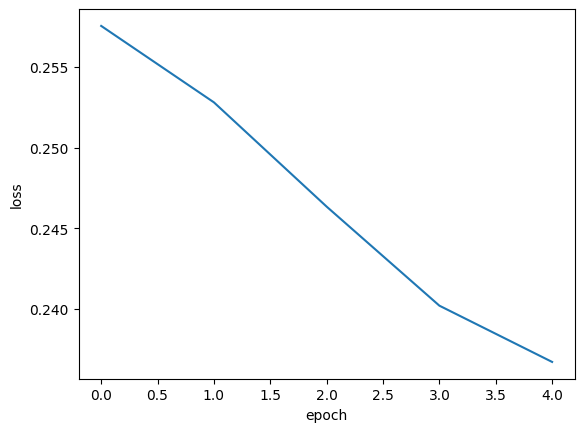

In [23]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss']) # 손실율을 차트로 표시
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작함 5개의 에포크가 0~4 까지 x축에 표현
plt.ylabel('loss') # 손실된 값
plt.show()

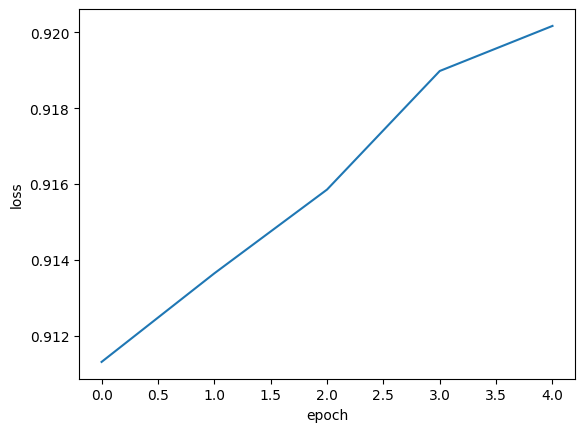

In [24]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상함

In [43]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자.

model = model_fn()  # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 1분정도 걸림

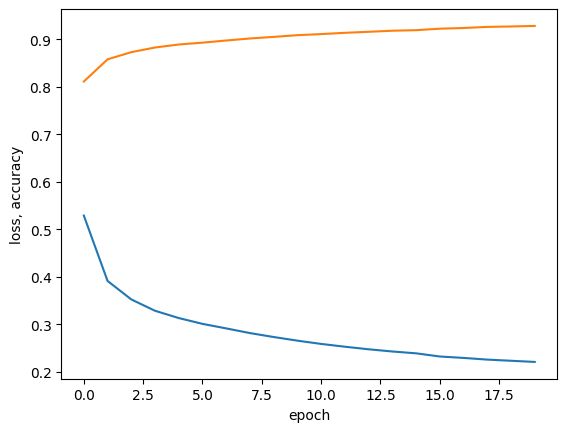

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [ ]:
# 검증 손실 validation_data=(val_scaled, val_target)
# 예전에 확률적 경사 하강법을 사용했을때 과대/과소 적합과 에포크사이에 관계부분이 있었다.
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 적용된다.

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트에 대한 점수도 필요하다
# 그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다.
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

# 키포인트는 https://wikidocs.net/236194 참고
# 손실 사용이랑 정확도 사용하는거의 차이는?
# 인공 신경망 모델이 최적화 하는 대상은 정확도가 아닌 손실 함수임.
# 손실 감소에 비례해 정확도가 높아지지 않는 경우도 있는데,
# 모델이 잘 훈련 되었는지 보려면 정확도 보단 손실함수의 값을 보는게 더 좋음.

In [46]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7646 - loss: 0.6757 - val_accuracy: 0.8488 - val_loss: 0.4273
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8510 - loss: 0.4070 - val_accuracy: 0.8543 - val_loss: 0.4093
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8674 - loss: 0.3606 - val_accuracy: 0.8565 - val_loss: 0.4015
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8794 - loss: 0.3357 - val_accuracy: 0.8587 - val_loss: 0.3974
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8871 - loss: 0.3169 - val_accuracy: 0.8610 - val_loss: 0.3930
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8936 - loss: 0.3051 - val_accuracy: 0.8637 - val_loss: 0.3919
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8995 - loss: 0.2918 - val_accuracy: 0.8705 - val_loss: 0.3859
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9022 - loss: 0.2846 - 

In [48]:
print(history.history.keys())
# 정확도accuracy, 손실loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


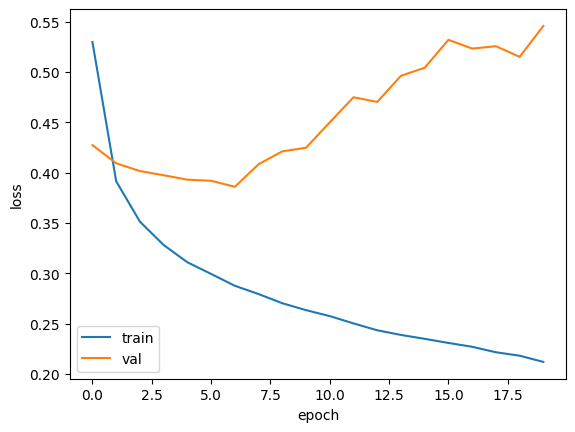

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 결과 분석 : 초기에 검증 손실이 감소하다 5번째 에포크만에 다시 상승함
# 훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄고
# 검증 세트에 대한 정확도가 증가할 것 같다.

# 과대 적합을 막기위한 방법으로 사용한 규제(릿지, 라쏘) 대신
# 신경망에 특화된 규제, 드롭아웃을 나중에 해보자.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


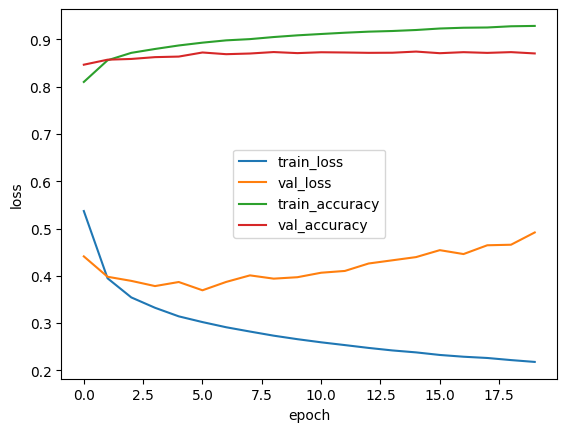

In [50]:
# 일단 지금은 옵티마이져(최적화)로 하이퍼 파라미터를 조절해서 과대적합 완화를 해보자.
#RMSprop 옵티마이저는 많은 문제에서 자아아아아아알 작동함 → 다른 방법으로 Adagrad, Adam이 있다.
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'legebd'

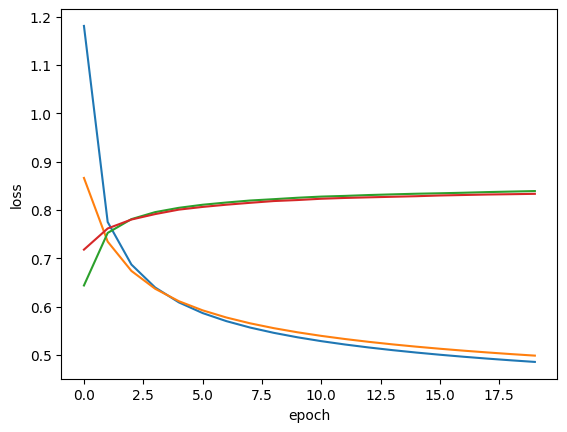

In [54]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legebd(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


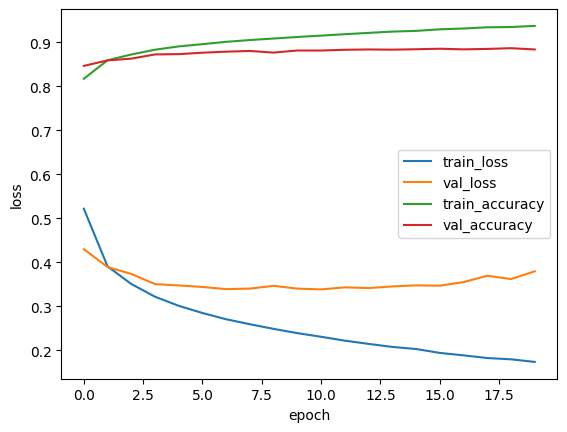

In [55]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다.
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

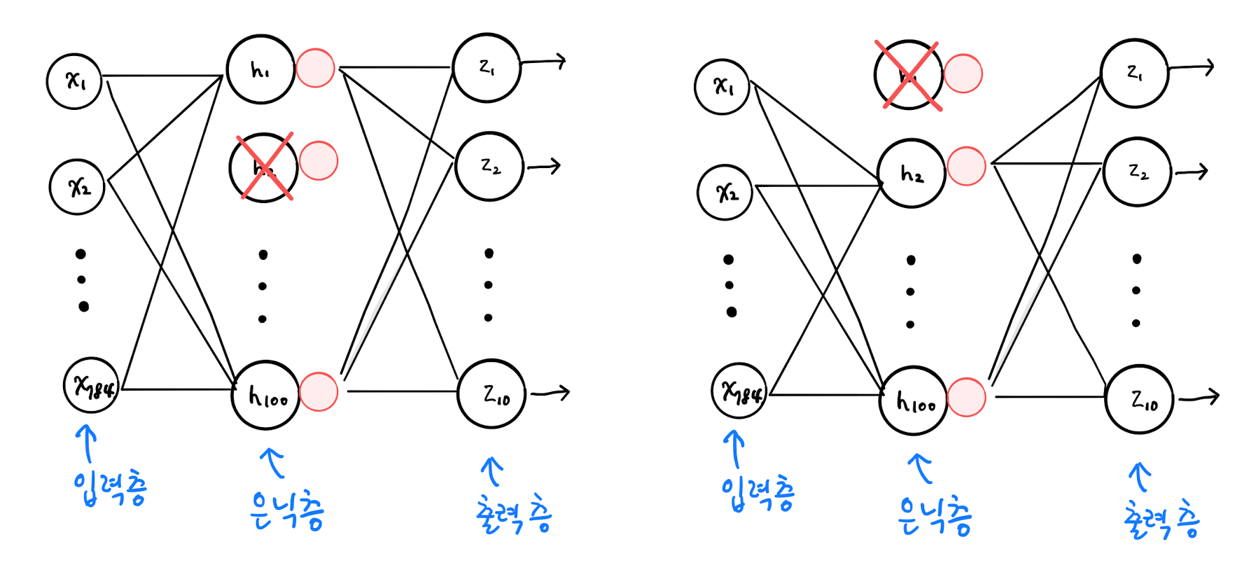

In [56]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는것은 마치 2개의 신경망을 앙상블 하는것 처럼 상상하게 됨
# 앙상블 : 더 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
#     과대 적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout으로 제공함
# 어떤 층의 뒤에 드롭아웃을 둬서 이층의 출력을 랜덤하게 0으로 만듬
# 드롭아웃이 층 처럼 쓰이지만 훈련되는 파라미터는 없다.

# model_fn 함수에 드롭아웃 객체 전달해서 층을 추가한다.
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

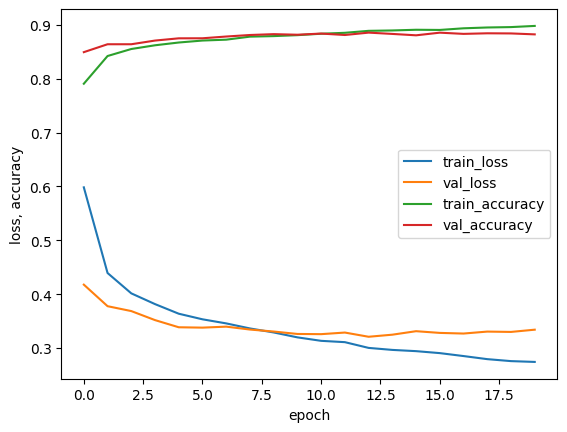

In [58]:
# 주의 사항으론 훈련이 끝난 뒤 평가나 예측 수행땐 드롭아웃 적용을 안한다
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행되기 때문이다.
# 텐서플로와 케라스는 모델을 평가ㆍ예측시 자동으로 드롭아웃을 적용하지않음.

# 훈련 손실과 검증 손실의 그래프를 그려보자.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
# 과대 적합이 확실이 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보까??? (조기종료에서 해보자.)

In [69]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

In [62]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:51 model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 03:51 model-whole-ep.keras


In [63]:
# 실험1
# 훈련하지 않은 새 모델을 만들고 model-ep10.weights.h5 파일에서
# 훈련된 모델 파라미터를 읽고 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-ep10.weights.h5')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# 모델의 검증 정확도를 확인해보자
import numpy as np

# predict() 메서드는 사이킷런 보다 다른샘플마다 10개의 클래스에 대한 확률을 반환 (다중 분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 수는 12,000개 이기 때문에
# predict()메서드는 (12000, 10)크기의 배열을 반환
# 10개의 확률중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도 계산을 해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target))

# axis = 1 이면 열을 따라 각 "행"의 최대값의 인덱스를,
# axis = 0 이면 행을 따라 각 "열"의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
#   → 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.87825


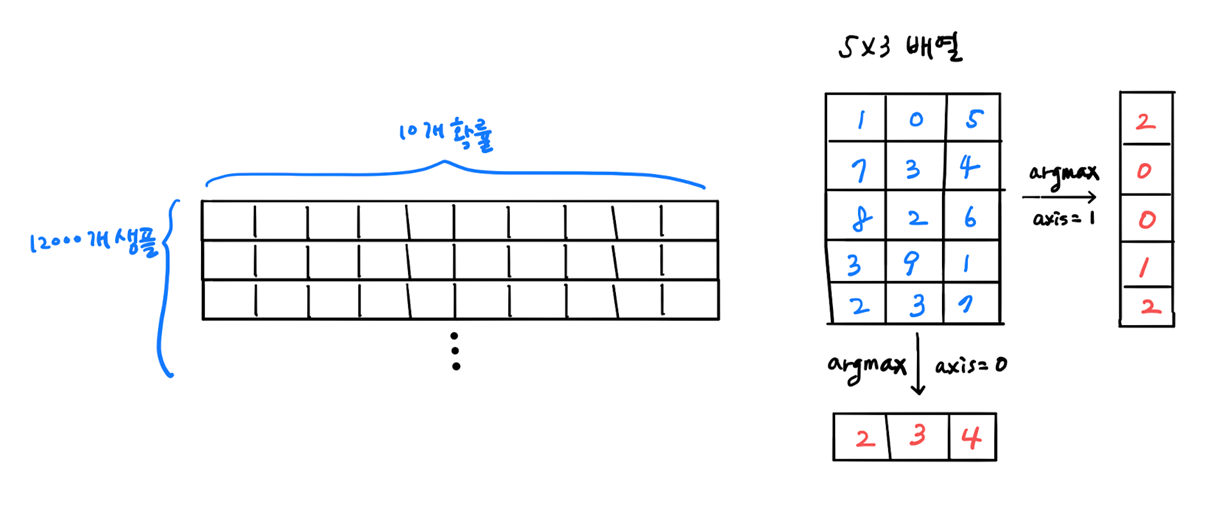

In [70]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력 해봄
model = keras.models.load_model('model-whole-ep10.keras') # load_model()저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자. -> 케라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3275


[0.32760950922966003, 0.8810833096504211]

In [73]:
# 실험2
# 아예 파일로 새로운 모델을 만들고 바로 사용해보자.
# 추가적으로 콜백이라는걸 활용해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는
# 객체, 케라스.콜백 패키지에 있다.
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용한다.
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로, 에포크마다 모델을 저장함
# save_best_only=True 매개변수를 지정해 가장 낮은 검증점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                 save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7332 - loss: 0.7710 - val_accuracy: 0.8416 - val_loss: 0.4371
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8370 - loss: 0.4549 - val_accuracy: 0.8607 - val_loss: 0.3772
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8527 - loss: 0.4097 - val_accuracy: 0.8675 - val_loss: 0.3587
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8589 - loss: 0.3864 - val_accuracy: 0.8660 - val_loss: 0.3556
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8632 - loss: 0.3716 - val_accuracy: 0.8755 - val_loss: 0.3367
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8687 - loss: 0.3579 - val_accuracy: 0.8815 - val_loss: 0.3303
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8732 - loss: 0.3443 - val_accuracy: 0.8784 - val_loss: 0.3336
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8766 - loss: 0.3341 -

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [74]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이
# 더 커지기 때문에 룬련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간절약이 됨 (조기종료. early stopping)

# 조기종료는 딥러닝 분야에 많이 사용하는 기법이다.
# 에포크의 횟수를 제한 하는 역할이나 모델의 과대적합 화를 막아주기도 한다. = 규제 방법중 하나.

In [76]:
# 케라스는 조기종료를 위해 EarlyStopping 콜백도 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 연속 검증점수가 향상되지 않을시 훈련 중지 (patience는 인내심 을 뜻한다.)
# restore_best_weights = True → 가장 낮은 검증 손실을 낸 모델을 파라미터로 돌린다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                 save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련 중지가 가능함
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7344 - loss: 0.7689 - val_accuracy: 0.8488 - val_loss: 0.4192
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8382 - loss: 0.4501 - val_accuracy: 0.8563 - val_loss: 0.3946
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8496 - loss: 0.4098 - val_accuracy: 0.8683 - val_loss: 0.3624
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8620 - loss: 0.3815 - val_accuracy: 0.8721 - val_loss: 0.3544
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8655 - loss: 0.3664 - val_accuracy: 0.8696 - val_loss: 0.3557
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8694 - loss: 0.3510 - val_accuracy: 0.8766 - val_loss: 0.3363
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8764 - loss: 0.3386 - val_accuracy: 0.8788 - val_loss: 0.3378
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8788 - loss: 0.3337 - 

In [77]:
print(early_stopping_cb.stopped_epoch)

9


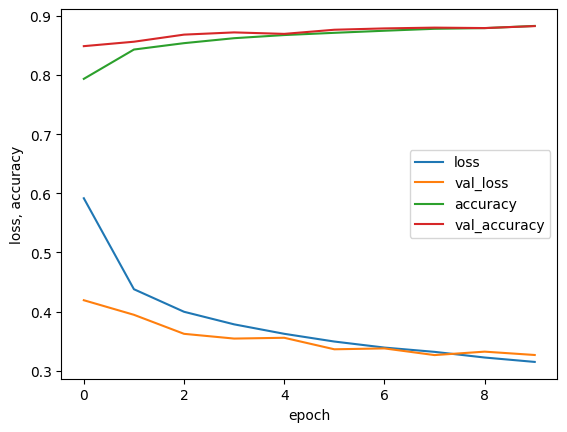

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3253


[0.3264608085155487, 0.8801666498184204]

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.49%, 88.09%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심